Nama : Rika Ajeng Finatih

NIM : 121450036

Kelas : Pengenalan Pola RA

# **Tugas Pertemuan 4 dan 5**



## **Implementasi NCC**

Matriks Asli 6x6:



```
    [100, 100, 100, 100, 100, 100],
    [100, 150, 150, 150, 150, 100],
    [100, 150, 255, 255, 150, 100],
    [100, 150, 255, 255, 150, 100],
    [100, 150, 150, 150, 150, 100],
    [100, 100, 100, 100, 100, 100]
```

Intensitas lebih tinggi di tengah, menunjukkan pusat gambar lebih terang dengan nilai 255, sementara tepi gambar lebih gelap dengan nilai 100.



In [71]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Gambar 6x6
image = np.array([
    [100, 100, 100, 100, 100, 100],
    [100, 150, 150, 150, 150, 100],
    [100, 150, 255, 255, 150, 100],
    [100, 150, 255, 255, 150, 100],
    [100, 150, 150, 150, 150, 100],
    [100, 100, 100, 100, 100, 100]
])

In [75]:
# Menghitung Gradien Gx dan Gy menggunakan Sobel
Gx = np.array([[ -1, 0, 1],
                [ -2, 0, 2],
                [ -1, 0, 1]])

Gy = np.array([[ -1, -2, -1],
                [  0,  0,  0],
                [  1,  2,  1]])

# Matriks Gx dan Gy
gradient_x = np.zeros(image.shape)
print("Nilai Gradien x:")
print(gradient_x)
gradient_y = np.zeros(image.shape)
print("\nNilai Gradien y:")
print(gradient_y)

Nilai Gradien x:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Nilai Gradien y:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [76]:
# Menghitung Gx
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        gradient_x[i, j] = np.sum(Gx * image[i-1:i+2, j-1:j+2])

# Menghitung Gy
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        gradient_y[i, j] = np.sum(Gy * image[i-1:i+2, j-1:j+2])

# Menghitung Magnitude
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
print("\nNilai Magnitude:")
print(magnitude)


Nilai Magnitude:
[[  0.           0.           0.           0.           0.
    0.        ]
 [  0.         360.62445841 525.59490104 525.59490104 360.62445841
    0.        ]
 [  0.         525.59490104 445.47727215 445.47727215 525.59490104
    0.        ]
 [  0.         525.59490104 445.47727215 445.47727215 525.59490104
    0.        ]
 [  0.         360.62445841 525.59490104 525.59490104 360.62445841
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


In [77]:
# Menghitung Orientasi
orientation = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)
print("\nNilai Orientation:")
print(orientation)


Nilai Orientation:
[[   0.           0.           0.           0.           0.
     0.       ]
 [   0.          45.          78.4762783  101.5237217  135.
     0.       ]
 [   0.          11.5237217   45.         135.         168.4762783
     0.       ]
 [   0.         -11.5237217  -45.        -135.        -168.4762783
     0.       ]
 [   0.         -45.         -78.4762783 -101.5237217 -135.
     0.       ]
 [   0.           0.           0.           0.           0.
     0.       ]]


In [78]:
# Normalisasi HOG
fd, hog_image = hog(image, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, channel_axis=None)
print("\nSebelum Normalisasi:")
print(hog_image)


Sebelum Normalisasi:
[[  0.           0.           0.           0.           0.
    0.        ]
 [  0.          17.67766953   0.          77.5          0.
   17.67766953]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.          77.5          0.         148.49243164   0.
   77.5       ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.          17.67766953   0.          77.5          0.
   17.67766953]]


In [79]:
# Normalisasi gambar HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
print("\nSetelah Normalisasi:")
print(hog_image_rescaled)


Setelah Normalisasi:
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1.]]


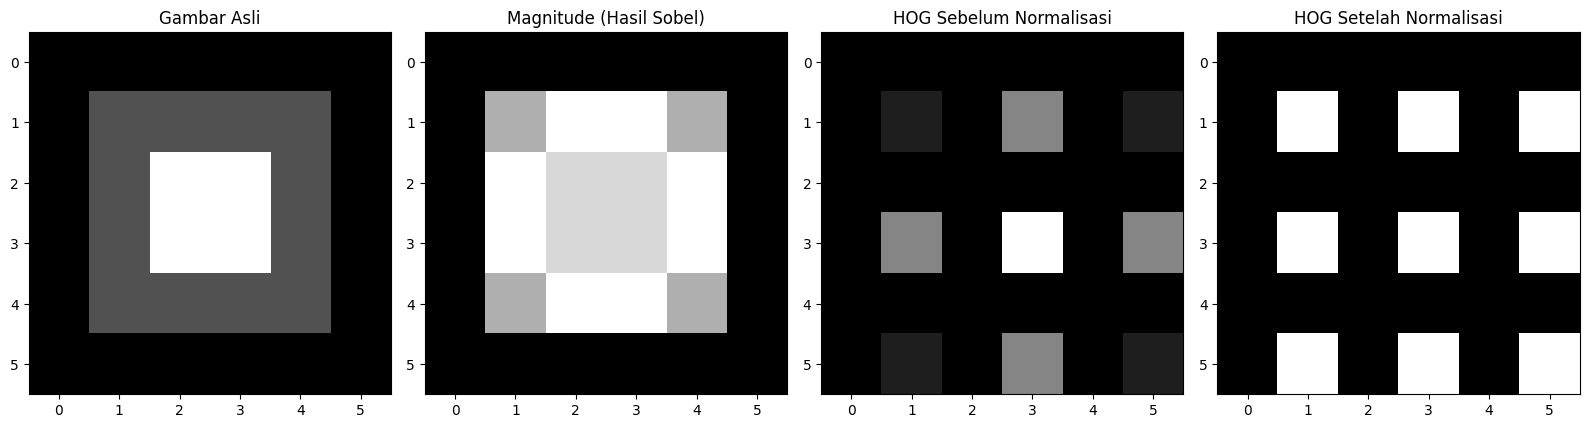

In [80]:
# Visualisasi
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

# Gambar Asli
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Gambar Asli')

# Gambar Magnitude (Hasil Sobel)
ax2.imshow(magnitude, cmap=plt.cm.gray)
ax2.set_title('Magnitude (Hasil Sobel)')

# Gambar HOG Sebelum Normalisasi
ax3.imshow(hog_image, cmap=plt.cm.gray)
ax3.set_title('HOG Sebelum Normalisasi')

# Gambar HOG Setelah Normalisasi
ax4.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax4.set_title('HOG Setelah Normalisasi')

for ax in (ax1, ax2, ax3, ax4):
    ax.axis('on')

plt.tight_layout()
plt.show()

**Analisis Hasil:**



Dari hasil yang diperoleh, baik melalui perhitungan manual maupun dengan bantuan kode program, terlihat adanya perbedaan signifikan antara hasil yang diharapkan dan hasil aktual yang diperoleh. Perbedaan ini menunjukkan bahwa meskipun langkah-langkah perhitungan telah diikuti dengan cermat, terdapat beberapa faktor yang dapat mempengaruhi hasil. Meskipun algoritma yang digunakan sama, perhitungan manual dapat dipengaruhi oleh kesalahan manusia, seperti kesalahan dalam menentukan gradien, magnitudo, atau orientasi. Sementara itu, kode Python yang mengimplementasikan algoritma HOG secara otomatis dapat melakukan perhitungan dengan akurasi tinggi, tetapi juga mungkin mengandung asumsi yang berbeda dalam implementasi.

## **Program Perbandingan Deteksi Tepi, HOG, dan LBP**

### **Deteksi Tepi (Edge Detection)**

Metode Canny mendeteksi tepi dengan menggunakan perubahan intensitas piksel yang tajam. Menggunakan Canny edge detection dari `OpenCV`.

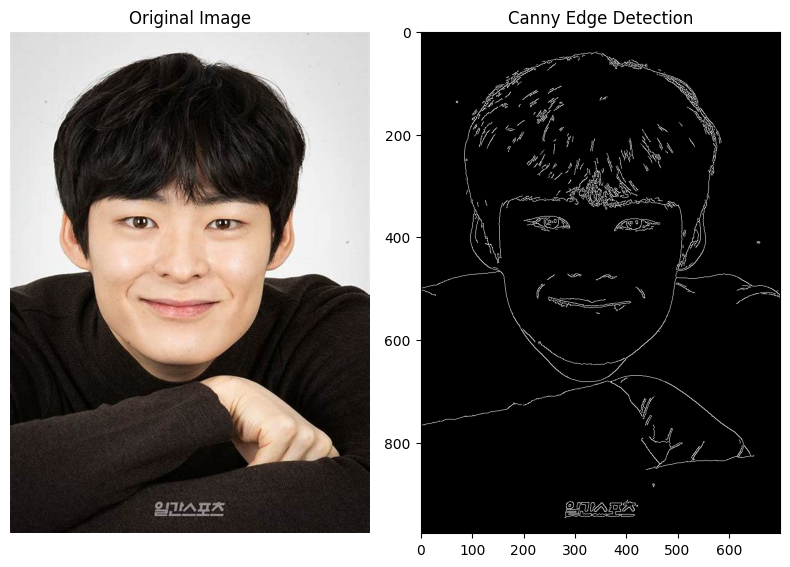

In [ ]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# 1. Mendownload gambar dari URL
url = 'https://th.bing.com/th/id/OIP.-tD-tv_M8sTPUFj5KNoUTQHaKV?w=700&h=977&rs=1&pid=ImgDetMain'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

# 2. Konversi gambar ke grayscale (deteksi tepi lebih baik pada grayscale)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Terapkan Canny Edge Detection dengan threshold rendah dan tinggi
low_threshold = 100
high_threshold = 200
edges = cv2.Canny(gray, low_threshold, high_threshold)

# 4. Tampilkan hasilnya menggunakan matplotlib
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('on')

plt.tight_layout()
plt.show()

**Hasil:** Hasil dari deteksi tepi menggunakan metode Canny menunjukkan garis-garis tepi yang jelas dari objek dalam gambar. Penggunaan dua threshold (rendah dan tinggi) dalam metode Canny memungkinkan deteksi tepi yang lebih baik, di mana tepi yang lebih kuat diidentifikasi dengan jelas, sementara tepi yang lebih lemah diabaikan.

**Visualisasi:**

* Gambar Asli: Gambar menunjukkan detail penuh dari objek.

* Hasil Deteksi Tepi: Gambar hasil menunjukkan tepi yang terdeteksi dalam warna putih di latar belakang hitam.

**Interpretasi:** Tepi-tepi yang terdeteksi dapat digunakan untuk mendeteksi objek dalam gambar, serta membantu dalam analisis lebih lanjut seperti pengenalan pola dan segmentasi gambar. Namun, pemilihan threshold yang tepat sangat penting; threshold yang terlalu tinggi dapat menghilangkan informasi penting, sementara threshold yang terlalu rendah dapat menghasilkan banyak noise.

### **Histogram of Oriented Gradients (HOG)**

Histogram of Oriented Gradients menghitung distribusi gradien atau perubahan intensitas arah tertentu di dalam gambar.Menggunakan fitur HOG dari `skimage.feature.`

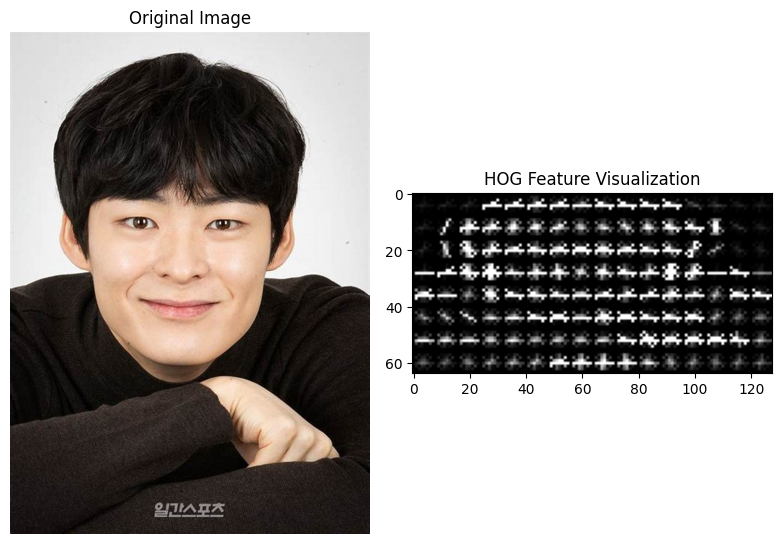

In [ ]:
from skimage.feature import hog
from skimage import exposure
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# 1. Mendownload gambar dari URL
url = 'https://th.bing.com/th/id/OIP.-tD-tv_M8sTPUFj5KNoUTQHaKV?w=700&h=977&rs=1&pid=ImgDetMain'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

# 2. Konversi gambar ke grayscale untuk HOG
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Ubah ukuran gambar (HOG lebih efisien pada ukuran yang lebih kecil)
resized_img = cv2.resize(gray, (128, 64))

# 4. Hitung fitur HOG dan gambar HOG untuk visualisasi
hog_features, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True, feature_vector=False)

# 5. Tingkatkan kontras gambar HOG untuk visualisasi yang lebih baik
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# 6. Tampilkan hasilnya menggunakan matplotlib
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Feature Visualization')
plt.axis('on')

plt.tight_layout()
plt.show()


**Hasil:** Metode HOG menghasilkan representasi dari gradien arah yang menggambarkan kontur dan struktur lokal dalam gambar. Fitur HOG efektif dalam menggambarkan bentuk objek, yang berguna dalam berbagai aplikasi pengenalan objek.

**Visualisasi:**

* Gambar Asli: Menunjukkan detail objek dengan warna penuh.

* Hasil HOG: Gambar hasil menampilkan gradien arah yang terakumulasi, di mana fitur-fitur penting ditunjukkan dengan kontras yang lebih baik.

**Interpretasi:** HOG sangat berguna untuk pengenalan objek dan deteksi bentuk, misalnya dalam pengenalan wajah atau kendaraan. Gambar hasil menekankan fitur-fitur penting, yang dapat digunakan untuk pengklasifikasian. Namun, sensitivitas terhadap perubahan pencahayaan dan sudut pandang dapat mempengaruhi hasil HOG.

### **Local Binary Pattern (LBP)**

Local Binary Pattern mengkodekan pola tekstur lokal di sekitar setiap piksel dengan membandingkan piksel pusat dengan tetangga sekitarnya. Menggunakan Local Binary Pattern dari `skimage.feature`.

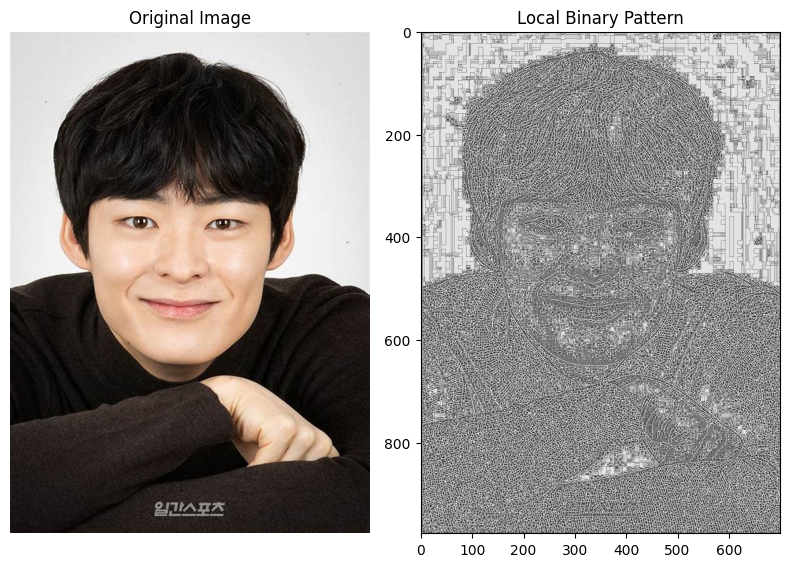

In [ ]:
from skimage.feature import local_binary_pattern
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# 1. Mendownload gambar dari URL
url = 'https://th.bing.com/th/id/OIP.-tD-tv_M8sTPUFj5KNoUTQHaKV?w=700&h=977&rs=1&pid=ImgDetMain'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

# 2. Konversi gambar ke grayscale untuk LBP
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Tentukan parameter LBP
radius = 1  # Radius dari lingkungan lingkaran
n_points = 8 * radius  # Jumlah titik dalam lingkungan lingkaran

# 4. Hitung Local Binary Pattern (LBP)
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

# 5. Tampilkan hasilnya menggunakan matplotlib
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('Local Binary Pattern')
plt.axis('on')

plt.tight_layout()
plt.show()


**Hasil:** Metode LBP menghasilkan representasi tekstur dari gambar dengan membandingkan nilai piksel pusat dengan nilai piksel tetangga. Ini menghasilkan peta pola yang menunjukkan variasi tekstur lokal di seluruh gambar.

**Visualisasi:**

* Gambar Asli: Menampilkan detail penuh dari objek.

* Hasil LBP: Gambar hasil menunjukkan pola tekstur yang telah dihasilkan, dengan area gelap menunjukkan pola yang serupa dan area terang menunjukkan variasi yang lebih besar.

**Interpretasi:** LBP sangat efektif dalam analisis tekstur dan dapat digunakan dalam aplikasi seperti pengenalan wajah dan segmentasi gambar. Representasi tekstur yang dihasilkan dapat digunakan untuk membedakan antara area berbeda dalam gambar berdasarkan pola teksturnya. Namun, LBP juga dapat sensitif terhadap noise, yang dapat mempengaruhi keakuratan hasil.

Program ini menunjukkan perbandingan yang jelas antara tiga metode deteksi fitur: Canny, HOG, dan LBP. Masing-masing metode memiliki kekuatan dan kelemahan yang unik, serta aplikasi yang berbeda tergantung pada tujuan analisis gambar. Deteksi tepi lebih berfokus pada mendeteksi batas-batas objek, sementara HOG dan LBP lebih berfokus pada karakteristik bentuk dan tekstur. Pemilihan metode yang tepat tergantung pada konteks penggunaan dan jenis gambar yang dianalisis.

